In [15]:
from sklearn.datasets import fetch_california_housing
import pandas as pd 


In [16]:
from sklearn.datasets import fetch_california_housing
import pandas as pd 

housing = fetch_california_housing()

df = pd.DataFrame(housing.data, columns= housing.feature_names)
df['target'] = housing.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [17]:
print("Dataset shape:",df.shape)
print(df.info())
print(df.describe())


Dataset shape: (20640, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0

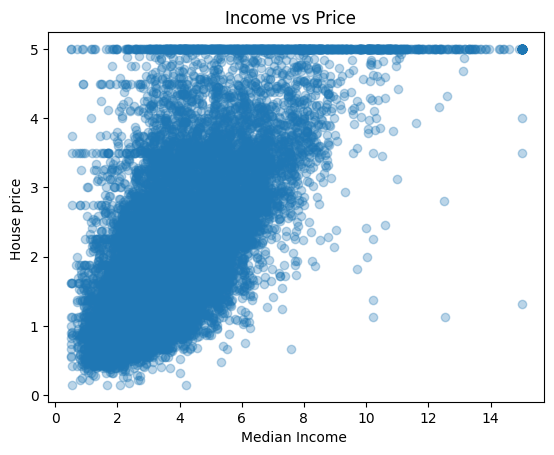

In [18]:
import matplotlib.pyplot as plt 

plt.scatter(df['MedInc'], df['target'], alpha=0.3)
plt.xlabel('Median Income ')
plt.ylabel('House price ')
plt.title('Income vs Price  ')

plt.show()


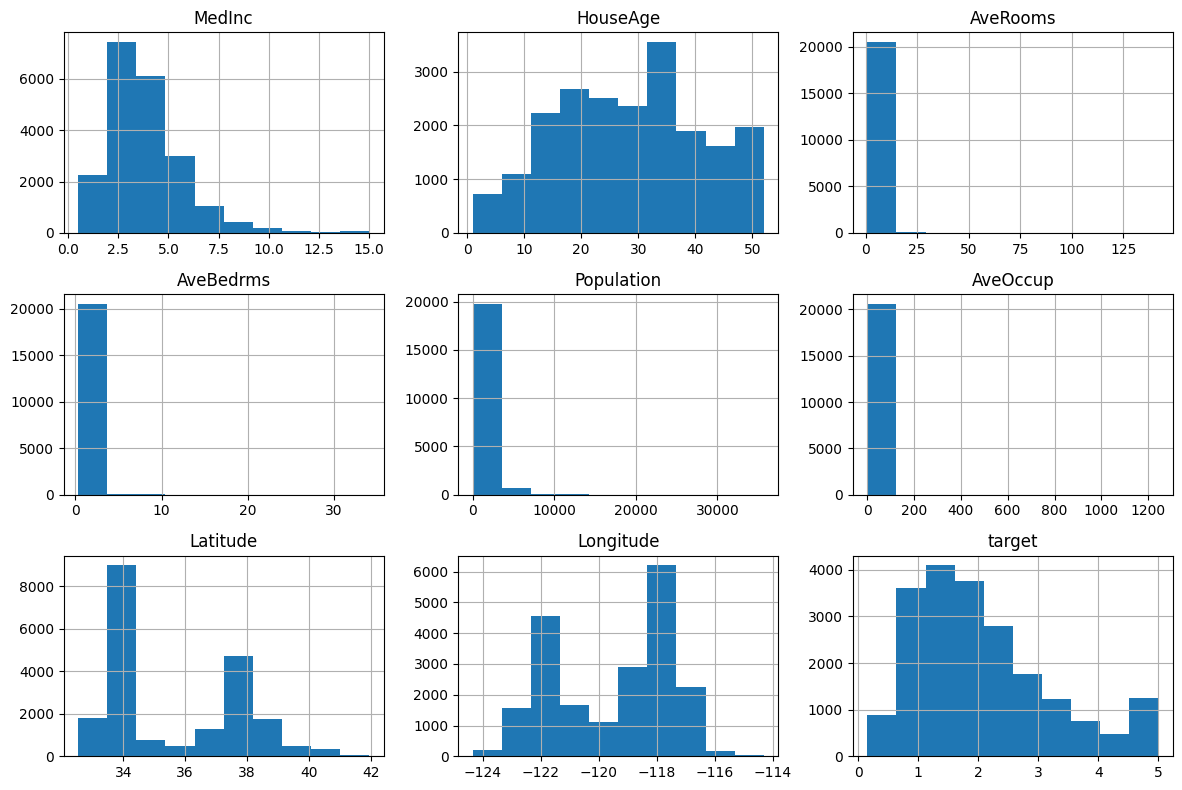

In [19]:
df.hist(figsize= (12,8))
plt.tight_layout()
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
x=df.drop('target',axis=1)
y=df['target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

print(" training data shape :",x_train.shape)
print(" testing data shape ",x_test.shape)

 training data shape : (16512, 8)
 testing data shape  (4128, 8)


In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)


In [22]:
from sklearn.metrics import mean_squared_error, r2_score

mse= mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(" Mean squared Error :",mse)
print("R2 score:",r2)


 Mean squared Error : 0.5558915986952442
R2 score: 0.575787706032451


In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

pipeline = Pipeline([('scaler',StandardScaler()),
                     ('model',LinearRegression())
                     ])

pipeline.fit(x_train,y_train)

y_pred_pipe = pipeline.predict(x_test)

print("r2 score pipeline",r2_score(y_test,y_pred_pipe))

r2 score pipeline 0.5757877060324508


In [24]:
import joblib
joblib.dump(pipeline, 'house_price_model.pkl')
pipeline = joblib.load('house_price_model.pkl')


In [25]:
loaded_pipeline = joblib.load('house_price_pipeline.pkl')
y_pred = loaded_pipeline.predict(x_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f"MSE : {mse:.2f}")
print(f"R2 : {r2:.2f}")

MSE : 0.56
R2 : 0.58


In [26]:
import os
print(os.getcwd())              # shows your current working directory
print(os.listdir())             # lists all files in your current directory


c:\Users\ASUS\OneDrive\Desktop\rasaproject\mlmodel-1
['.ipynb_checkpoints', '.venv', 'app.py', 'house_price.ipynb', 'house_price_model.pkl', 'house_price_pipeline.pkl', 'model', 'untitled.py']


In [27]:
import joblib
joblib.dump(pipeline, 'house_price_pipeline.pkl')


['house_price_pipeline.pkl']

In [28]:
loaded_pipeline = joblib.load(r"C:\Users\ASUS\OneDrive\Desktop\rasaproject\mlmodel-1\house_price_pipeline.pkl")



In [29]:
loaded_pipeline = joblib.load('./house_price_pipeline.pkl')
